In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm

import utils

In [2]:
train_data = np.loadtxt(open("data/train_data.csv", "rb"), delimiter=",")
train_labels = np.loadtxt(open("data/train_labels.csv", "rb"), delimiter=",")
test_data = np.loadtxt(open("data/test_data.csv", "rb"), delimiter=",")

In [3]:
scaler = StandardScaler()
train_data_stand = scaler.fit_transform(train_data)
test_data_stand = scaler.fit_transform(test_data)

In [4]:
acc_lin = []
acc_poly = []
acc_rbf = []
acc_sig = []

because we have unbalanced data (a lot of 1 labels) we choose the option class_weight='balanced' to balance our data.

In [5]:
SVM_lin = svm.SVC(cache_size=2000, class_weight='balanced', kernel='linear', gamma=2, C=0.8)
SVM_poly = svm.SVC(cache_size=2000, class_weight='balanced', kernel='poly', gamma=2, C=0.8)
SVM_rbf = svm.SVC(cache_size=2000, class_weight='balanced', kernel='rbf',gamma=2, C=0.8)
SVM_sig = svm.SVC(cache_size=2000, class_weight='balanced', kernel='sigmoid',gamma=2, C=0.8)

In [11]:
SVM_lin.fit(train_data_stand,train_labels)
SVM_poly.fit(train_data_stand,train_labels)
#SVM_rbf.fit(train_data_stand,train_labels)
#SVM_sig.fit(train_data_stand,train_labels)

SVC(C=0.8, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predic_lin = SVM_lin.predict(train_data_stand)
predic_poly = SVM_poly.predict(train_data_stand)
#predic_rbf = SVM_rbf.predict(train_data_stand)
#predic_sig = SVM_sig.predict(train_data_stand)

In [92]:
acc_lin.append(sum(predic_lin == train_labels) / len(train_labels))
acc_poly.append(sum(predic_poly == train_labels) / len(train_labels))
acc_rbf.append(sum(predic_rbf == train_labels) / len(train_labels))
acc_sig.append(sum(predic_sig == train_labels) / len(train_labels))

In [95]:
n = len(acc_lin)
print(f'LIN: \t current accuary: {acc_lin[n-1]} \t before was: {acc_lin[n-2]} \t difference: {acc_lin[n-1] - acc_lin[2-1] }')
print(f'Poly: \t current accuary: {acc_poly[n-1]} \t before was: {acc_poly[n-2]} \t difference: {acc_poly[n-1] - acc_poly[2-1]}')
print(f'RBF: \t current accuary: {acc_rbf[n-1]} \t before was: {acc_rbf[n-2]} \t difference: {acc_rbf[n-1] - acc_rbf[2-1]}')
print(f'SIG: \t current accuary: {acc_sig[n-1]} \t before was: {acc_sig[n-2]} \t difference: {acc_sig[n-1] - acc_sig[2-1]}')

LIN: 	 current accuary: 0.8517075406830162 	 before was: 0.8546871418748567 	 difference: -0.0029796011918404863
Poly: 	 current accuary: 1.0 	 before was: 1.0 	 difference: 0.0
RBF: 	 current accuary: 0.8583543433417373 	 before was: 0.8583543433417373 	 difference: 0.0
SIG: 	 current accuary: 0.22461608984643594 	 before was: 0.2200320880128352 	 difference: 0.004584001833600748


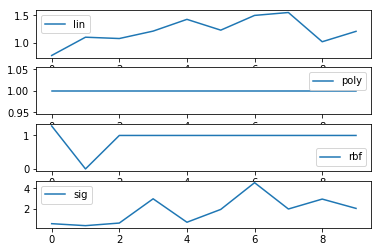

In [88]:
tmp_lin = []
tmp_poly = []
tmp_rbf = []
tmp_sig = []

for i in range(1,11):
    tmp_lin.append(sum(predic_lin == i)/sum(train_labels == i))
    tmp_poly.append(sum(predic_poly == i)/sum(train_labels == i))
    tmp_rbf.append(sum(predic_rbf == i)/sum(train_labels == i))
    tmp_sig.append(sum(predic_sig == i)/sum(train_labels == i))


f, axarr = plt.subplots(4)
axarr[0].plot(tmp_lin, label='lin')
axarr[0].legend()
axarr[1].plot(tmp_poly, label='poly')
axarr[1].legend()
axarr[2].plot(tmp_rbf, label='rbf')
axarr[2].legend()
axarr[3].plot(tmp_sig, label='sig')
axarr[3].legend()


#plt.axhline(1, color='r', label=r'$k = 0.7$')

1.3144157218221495

In [14]:
utils.make_submission(SVM_lin.predict(test_data_stand),'SVM-lin')

In [34]:
utils.make_submission(SVM_poly.predict(test_data_stand),'SVM-poly')

(6544,)

In [33]:
test_data.shape

(6544, 264)

In [64]:
sum(predic == 1) / sum(train_labels == 1)

0.67753789618741389

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_labels, SVM_lin.predict(train_data_stand))

Confusion matrix, without normalization
[[1628  125   23   48   93   68   66  108    1   18]
 [  43  550    7    7    2    5    4    0    0    0]
 [   1    3  322    0    0    0    0    0    0    0]
 [   3    0    0  249    0    1    0    0    0    0]
 [   3    0    0    0  209    0    2    0    0    0]
 [   6    1    1    3    0  249    0    0    0    0]
 [   2    0    0    0    0    1  138    0    0    0]
 [   2    0    0    0    0    0    0  193    0    0]
 [   0    0    0    0    0    0    0    0   92    0]
 [   0    0    0    0    0    0    0    0    0   86]]


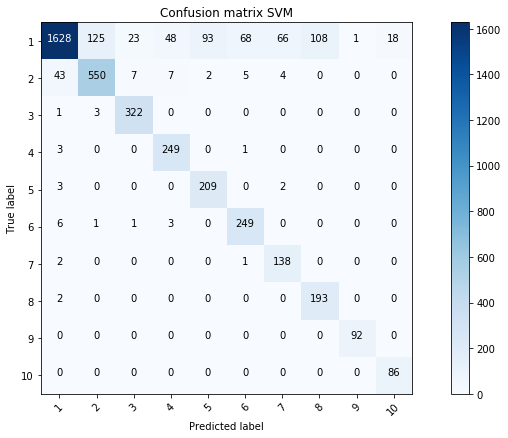

In [16]:
utils.plot_confusion_matrix(cm, title='Confusion matrix SVM')